## 1.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for aesthetics
sns.set_style('whitegrid')
%matplotlib inline

## 1.2 Load the Datasets

We'll load both the training and testing datasets to compare their basic properties.

In [4]:
try:
    df_train = pd.read_csv('../dataset/train.csv')
    df_test = pd.read_csv('../dataset/test.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the csv files are in the 'dataset' folder.")

## 1.3 Initial Data Inspection

Let's get a first look at the training data's structure, shape, and column types.

In [5]:
print("First 3 rows of the training dataset:")
df_train.head(3)

First 3 rows of the training dataset:


,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5,correct_option_number
0,Optimization of actions and planning,Maria needs to prepare for a party and has lim...,Maria should first prepare the cake and put it...,"Bake the cake, decorate the living room, pick ...","Decorate the living room, bake the cake, pick ...","Pick up friend, bake the cake, decorate the li...","Bake the cake, decorate the living room, pick ...",Another answer,4
1,Spatial reasoning,"In a room, there are 4 corners: A, B, C, and D...",The only point in a square room that is equidi...,At the center of the room,Halfway between corner A and the center of the...,At corner A,"Nowhere, because it's a logical trap",Another answer,4
2,Spatial reasoning,"Imagine that you are in a room with 4 walls, e...","To solve this spatial reasoning puzzle, you mu...","Right, Forward, Left","Right, Left, Forward","Forward, Left, Right","Left, Right, Forward",Another answer,5


In [6]:
print(f"Training data dimensions (rows, columns): {df_train.shape}")
print(f"Testing data dimensions (rows, columns): {df_test.shape}")

Training data dimensions (rows, columns): (384, 9)
Testing data dimensions (rows, columns): (96, 7)


In [7]:
print("Training data info (column types and non-null counts):")
df_train.info()

Training data info (column types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   topic                  384 non-null    object
 1   problem_statement      384 non-null    object
 2   solution               384 non-null    object
 3   answer_option_1        384 non-null    object
 4   answer_option_2        384 non-null    object
 5   answer_option_3        384 non-null    object
 6   answer_option_4        382 non-null    object
 7   answer_option_5        384 non-null    object
 8   correct_option_number  384 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 27.1+ KB


## 1.4 Target Variable Analysis

The target variable is `correct_option_number`. Let's analyze its distribution to see if the dataset is balanced in terms of correct answers.

C:\Users\Ramana\AppData\Local\Temp\ipykernel_35604\3047421701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='correct_option_number', data=df_train, palette='viridis')


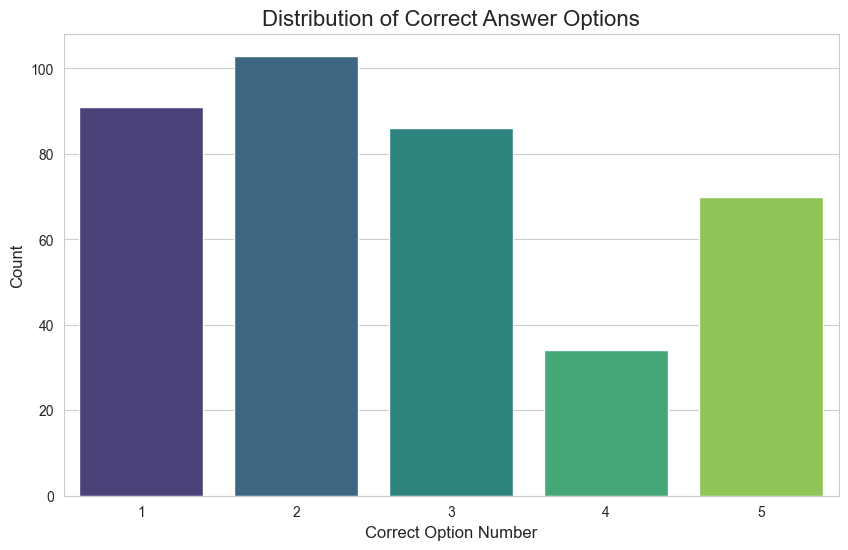


Value counts for the target variable:
correct_option_number
1    0.236979
2    0.268229
3    0.223958
4    0.088542
5    0.182292
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='correct_option_number', data=df_train, palette='viridis')
plt.title('Distribution of Correct Answer Options', fontsize=16)
plt.xlabel('Correct Option Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

print("\nValue counts for the target variable:")
print(df_train['correct_option_number'].value_counts(normalize=True).sort_index())

## 1.5 Topic Distribution

Understanding the distribution of topics is key to knowing the dataset's focus areas. A balanced set of topics is often desirable.

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='topic', data=df_train, order=df_train['topic'].value_counts().index, palette='plasma')
plt.title('Distribution of Topics in the Training Data', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.show()


Descriptive statistics for categorical columns:


,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5
count,384,384,384,384,384,384,382,384
unique,7,384,384,320,321,333,327,1
top,Spatial reasoning,Ashley is planning her study schedule for the ...,"Let's say Ashley spends 't' hours on Physics, ...",5,3,4,6,Another answer
freq,94,1,1,7,6,8,7,384


## 1.6 Text Feature Analysis

The core of the dataset is text. Analyzing the length of problem statements and solutions can give us a proxy for question complexity. Longer text might indicate a more detailed problem.

In [ ]:
# Create new features for text length
df_train['problem_length'] = df_train['problem_statement'].str.len()
df_train['solution_length'] = df_train['solution'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot problem statement length
sns.histplot(df_train['problem_length'], ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Problem Statement Length')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Frequency')

# Plot solution length
sns.histplot(df_train['solution_length'], ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Distribution of Solution Length')
axes[1].set_xlabel('Length (characters)')

plt.tight_layout()
plt.show()

Columns with missing values:


,Missing Values,% of Total Values
answer_option_4,2,0.520833


### Text Length by Topic

Does the complexity (i.e., length) of the problem statement vary by topic?

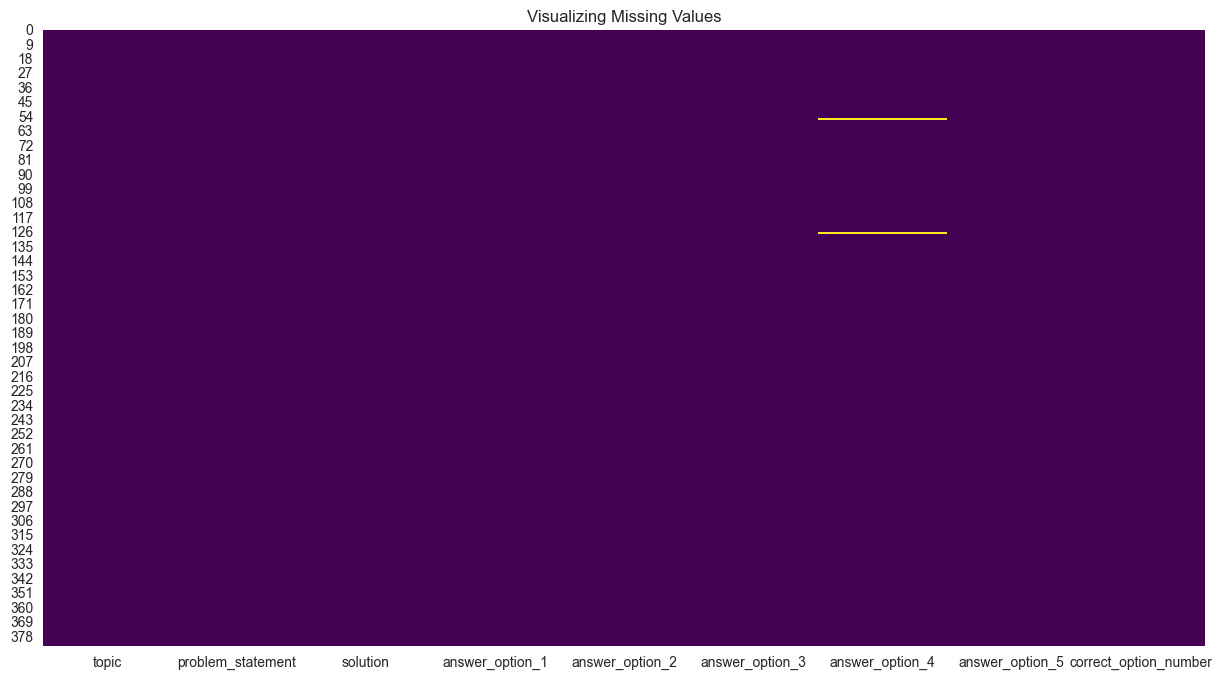

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='problem_length', y='topic', data=df_train, palette='coolwarm')
plt.title('Problem Statement Length by Topic', fontsize=16)
plt.xlabel('Length (characters)', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.show()